# Final Project
In this project, our aim is to building a model for predicting dimond prices. Our label (output) will be price column. Do not forget, this is a Classification problem!

# Content
carat: weight of the diamond (0.2--5.01)

cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color: diamond colour, from J (worst) to D (best)

clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x: length in mm (0--10.74)

y: width in mm (0--58.9)

z: depth in mm (0--31.8)

depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table: width of top of diamond relative to widest point (43--95)

# Steps
* Read the diamonds.csv file and describe it.
* Make at least 4 different analysis on Exploratory Data Analysis section.
* Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
* Define appropriate evaluation metric for our case (classification). Hint: Is there any imbalanced problem in the label column?
* Split the dataset into train and test set. (Consider the imbalanced problem if is there any). Check the distribution of labels in the subsets (train and test).
* Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
* Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
* Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
* Analyse and compare results of 3 algorithms.
* Select best performing model based on evaluation metric you chose on test dataset.

Good luck :)

# Feride ÜNLÜ

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [141]:
# Read csv
df = pd.read_csv("diamonds.csv")
df

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [142]:
df.describe()

,index,carat,depth,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,10.740000,58.900000,31.800000


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [144]:
# x * y * z, we can add volume feature to our dataset
df["volume"] = df["x"]*df["y"]*df["z"]

In [145]:
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,38.202030
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,34.505856
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,38.076885
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,46.724580
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,51.917250


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
 11  volume   53940 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 4.9+ MB


In [147]:
df.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
volume     0
dtype: int64

In [148]:
# Check duplicate values and missing data
df.duplicated().sum()

0

In [149]:
df.isin(['?']).sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
volume     0
dtype: int64

In [150]:
df.groupby(by="price").count()

,index,carat,cut,color,clarity,depth,table,x,y,z,volume
price,,,,,,,,,,,
High,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308,2308
Low,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271,11271
Medium,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109,4109
Very High,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589,1589
Very Low,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663,34663


In [151]:
df['price'].value_counts()

Very Low     34663
Low          11271
Medium        4109
High          2308
Very High     1589
Name: price, dtype: int64

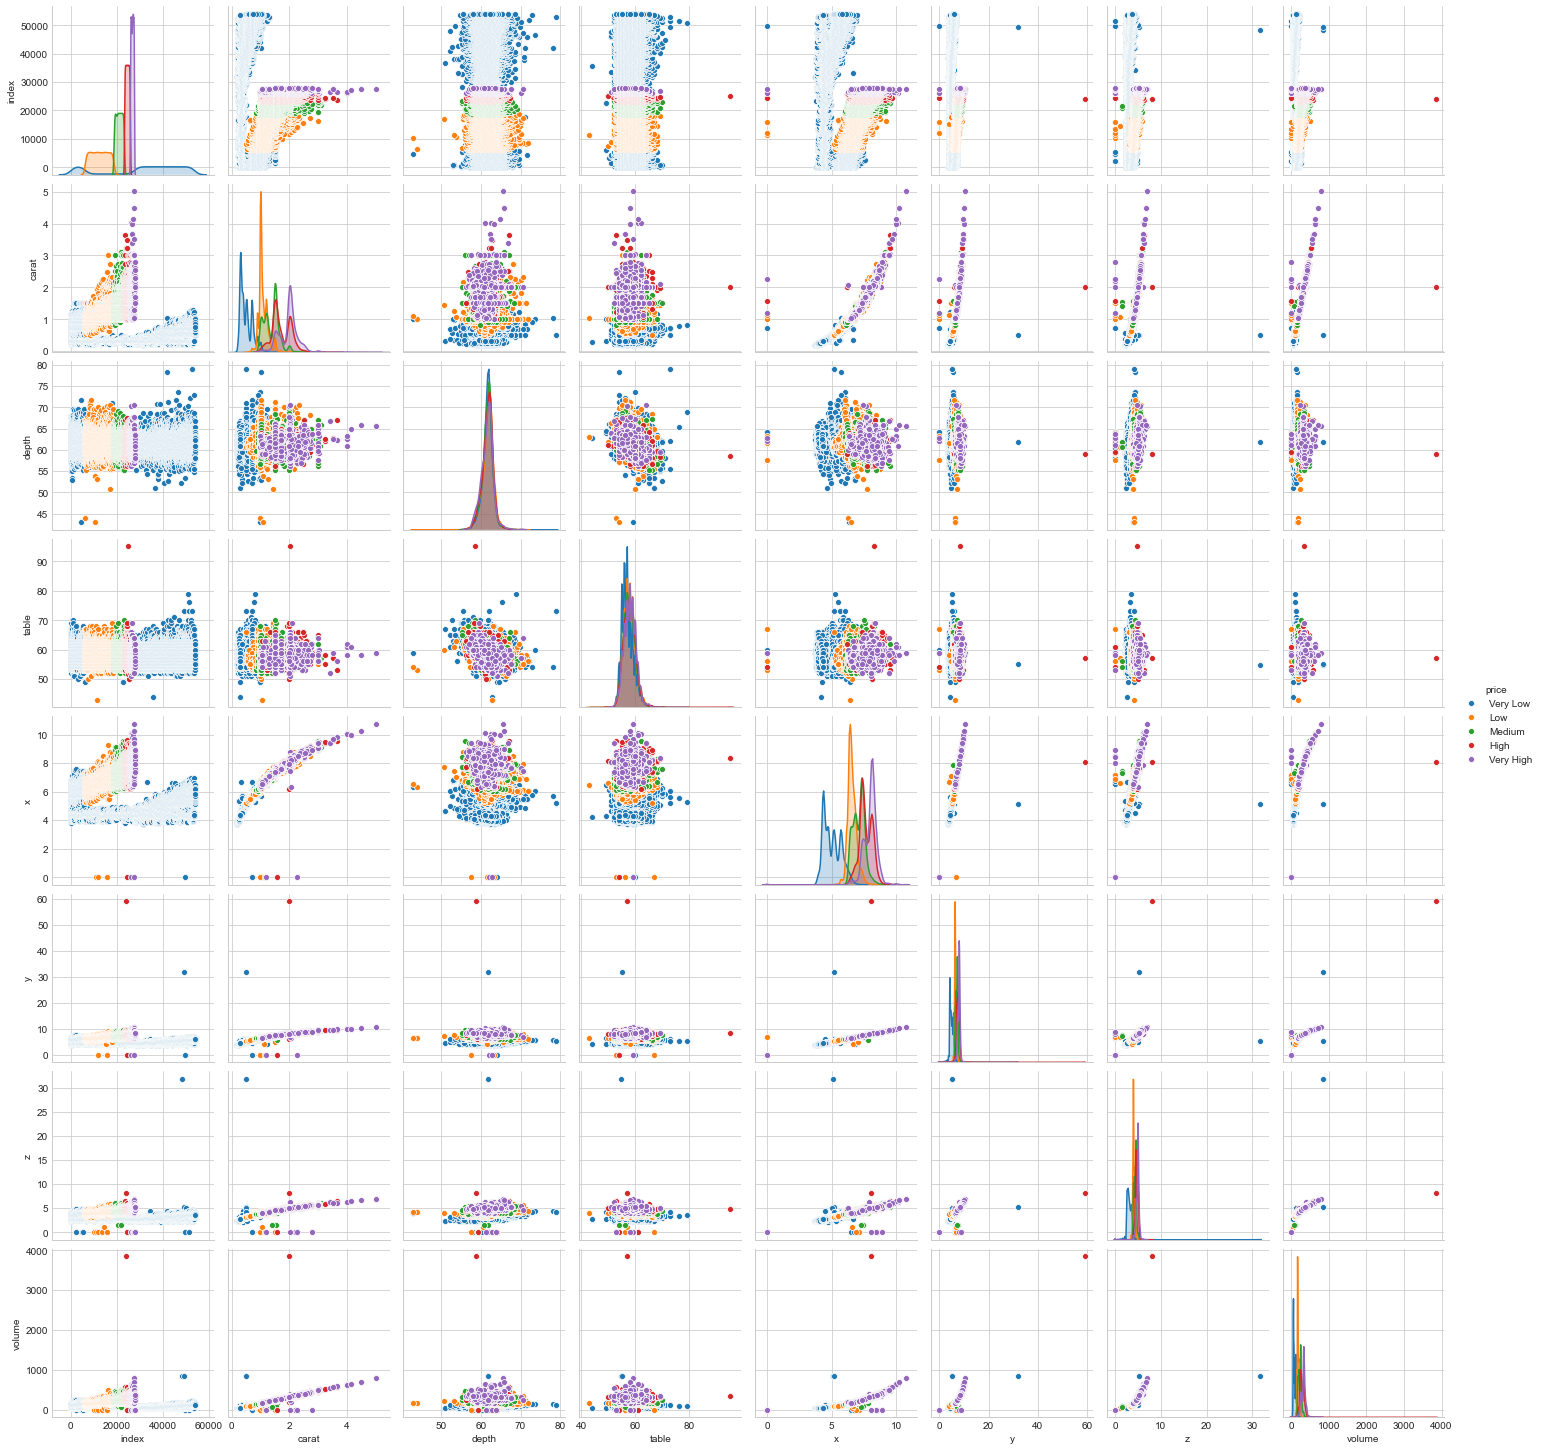

In [88]:
sns.pairplot(df, hue="price")

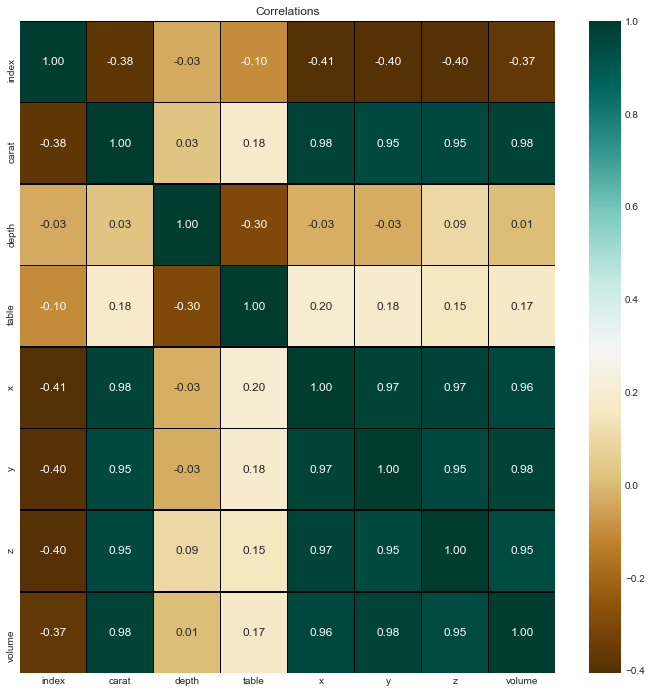

In [152]:
plt.style.use("seaborn-whitegrid")
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True,annot_kws = {"size": 12},linecolor = "black", linewidths=0.5, fmt = '.2f', ax=ax,cmap = "BrBG")
plt.title("Correlations")
plt.show()

In [153]:
df['cut'] = df['cut'].map({'Fair':1, 'Good': 2, 'Very Good': 3, 'Premium':4, 'Ideal':5})
df.head()

,index,carat,cut,color,clarity,depth,table,x,y,z,price,volume
0,1,0.23,5,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low,38.202030
1,2,0.21,4,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low,34.505856
2,3,0.23,2,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low,38.076885
3,4,0.29,4,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low,46.724580
4,5,0.31,2,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low,51.917250


In [154]:
df = pd.get_dummies(data = df, columns = ['color','clarity'])
df.head()

,index,carat,cut,depth,table,x,y,z,price,volume,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,5,61.5,55.0,3.95,3.98,2.43,Very Low,38.202030,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,4,59.8,61.0,3.89,3.84,2.31,Very Low,34.505856,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,2,56.9,65.0,4.05,4.07,2.31,Very Low,38.076885,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,4,62.4,58.0,4.20,4.23,2.63,Very Low,46.724580,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,2,63.3,58.0,4.34,4.35,2.75,Very Low,51.917250,...,0,1,0,0,0,1,0,0,0,0


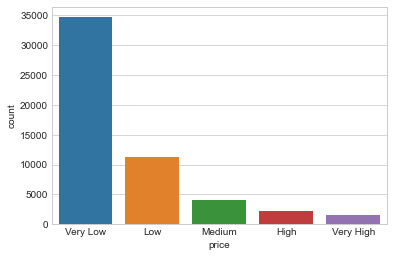

In [155]:
from seaborn import countplot

for feature in df.dtypes[df.dtypes == object].index:
    sns.countplot(data= df, x= feature)
    plt.show()

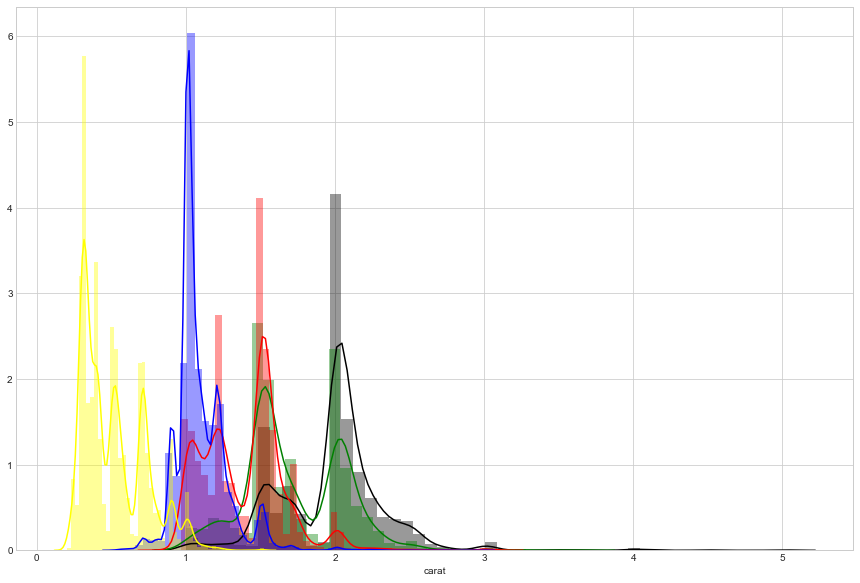

In [156]:
plt.figure(figsize=(15, 10))
sns.distplot(df[df.price == "Very High"].carat, color="black")
sns.distplot(df[df.price == "High"].carat,color="green")
sns.distplot(df[df.price == "Medium"].carat,color="red")
sns.distplot(df[df.price == "Low"].carat,color="blue")
sns.distplot(df[df.price == "Very Low"].carat,color="yellow")

In [157]:
df['price'] = df['price'].map({'Very Low':1, 'Low': 2, 'Medium': 3, 'High':4, 'Very High':5})
df.head()

,index,carat,cut,depth,table,x,y,z,price,volume,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,1,0.23,5,61.5,55.0,3.95,3.98,2.43,1,38.202030,...,0,0,0,0,0,1,0,0,0,0
1,2,0.21,4,59.8,61.0,3.89,3.84,2.31,1,34.505856,...,0,0,0,0,1,0,0,0,0,0
2,3,0.23,2,56.9,65.0,4.05,4.07,2.31,1,38.076885,...,0,0,0,0,0,0,1,0,0,0
3,4,0.29,4,62.4,58.0,4.20,4.23,2.63,1,46.724580,...,1,0,0,0,0,0,0,1,0,0
4,5,0.31,2,63.3,58.0,4.34,4.35,2.75,1,51.917250,...,0,1,0,0,0,1,0,0,0,0


In [158]:
# Specify x and y datas
X = df.drop(['price'], axis = 1)
y = df.price

In [136]:
from collections import Counter
counter = Counter(y)
print(counter)

Counter({'Very Low': 34663, 'Low': 11271, 'Medium': 4109, 'High': 2308, 'Very High': 1589})


In [159]:
#scaling data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-1.7320187 , -1.19816781,  0.98147332, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-1.73195448, -1.24036129,  0.08588908, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [-1.73189025, -1.19816781, -1.70527938, ..., -0.54229492,
        -0.26960284, -0.32195387],
       ...,
       [ 1.73189025, -0.20662095, -0.80969515, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [ 1.73195448,  0.13092691,  0.08588908, ..., -0.54229492,
        -0.26960284, -0.32195387],
       [ 1.7320187 , -0.10113725,  0.98147332, ..., -0.54229492,
        -0.26960284, -0.32195387]])

In [160]:
# convert numpy array to a dataframe
X_s = pd.DataFrame(X_scaled)
X_s

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.732019,-1.198168,0.981473,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,-1.171294,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
1,-1.731954,-1.240361,0.085889,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,-1.218533,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
2,-1.731890,-1.198168,-1.705279,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,-1.172894,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,2.366727,-0.542295,-0.269603,-0.321954
3,-1.731826,-1.071587,0.085889,0.454133,0.242928,-1.364971,-1.317305,-1.287720,-1.062372,-0.379005,...,2.991381,-0.234343,-0.11802,-0.185268,-0.565361,-0.453289,-0.422524,1.844015,-0.269603,-0.321954
4,-1.731762,-1.029394,-1.705279,1.082358,0.242928,-1.240167,-1.212238,-1.117674,-0.996008,-0.379005,...,-0.334294,4.267248,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,1.731762,-0.164427,0.981473,-0.662711,-0.204605,0.016798,0.022304,-0.054888,-0.178024,2.638489,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53936,1.731826,-0.164427,-1.705279,0.942753,-1.099672,-0.036690,0.013548,0.100988,-0.150033,2.638489,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53937,1.731890,-0.206621,-0.809695,0.733344,1.137995,-0.063434,-0.047741,0.030135,-0.196815,2.638489,...,-0.334294,-0.234343,-0.11802,-0.185268,1.768781,-0.453289,-0.422524,-0.542295,-0.269603,-0.321954
53938,1.731954,0.130927,0.085889,-0.523105,0.242928,0.373383,0.337506,0.285204,0.139520,-0.379005,...,-0.334294,-0.234343,-0.11802,-0.185268,-0.565361,2.206098,-0.422524,-0.542295,-0.269603,-0.321954


In [161]:
#Splitting dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_s, y, test_size=0.3, random_state=42)

# Decision Tree Classifier

In [162]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

score_dt = clf.score(X_test,y_test)

Accuracy of train: 0.9923195084485407
Accuracy of test: 0.9923371647509579


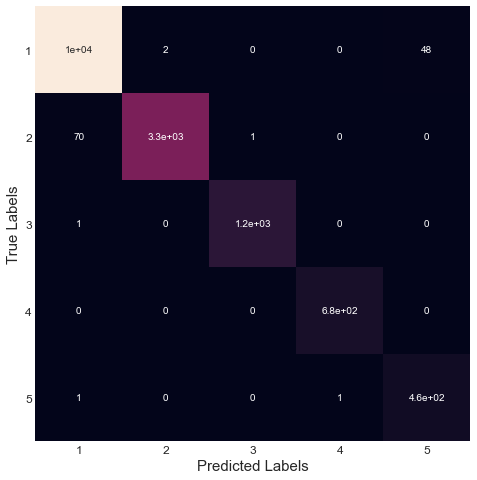

In [163]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
pred = clf.predict(X_test)
categories = [1, 2,3,4,5]
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()   

In [164]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.978961918343708
Recall = 0.9937771923781792
Accuracy = 0.9923371647509579
F1 Score = 0.9859116380260591


There is no underfitting or overfitting problem for this algorithm since it has training and test scores that are close to each other.

# KNN Classification

In [165]:
# import KNeighbors ClaSSifier from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate the model
knn = KNeighborsClassifier(n_neighbors=5)


# fit the model to the training set
knn.fit(X_train, y_train)

# Predict the Test set results
pred_knn = knn.predict(X_test)
print('Model accuracy score with n = 5 : {0:0.4f}'. format(accuracy_score(y_test, pred_knn)))

Model accuracy score with n = 5 : 0.9197


In [166]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

score_knn = knn.score(X_test, y_test)

Training set score: 0.9451
Test set score: 0.9197


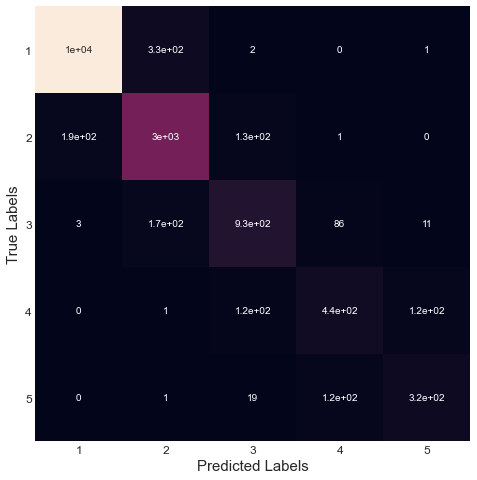

In [167]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

categories = [1, 2,3,4,5]
cm = confusion_matrix(y_test, pred_knn)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()  

In [168]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred_knn, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred_knn, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred_knn)))
print("F1 Score = {}".format(f1_score(y_test, pred_knn,average='macro')))

Precision = 0.8008028892610307
Recall = 0.7987864749688922
Accuracy = 0.9196638240019775
F1 Score = 0.7995683482380066


There is no underfitting or overfitting problem for this algorithm since it has training and test scores that are close to each other.

# Random Forest Classifier

In [118]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier with 100 decision trees 

rfc = RandomForestClassifier(random_state=0)

# fit the model

rfc.fit(X_train, y_train)

# Predict the Test set results

y_pred_rfc = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_rfc)))

Model accuracy score with 10 decision-trees : 0.9986


In [129]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

score_rfc = rfc.score(X_test, y_test)

Training set score: 1.0000
Test set score: 0.9986


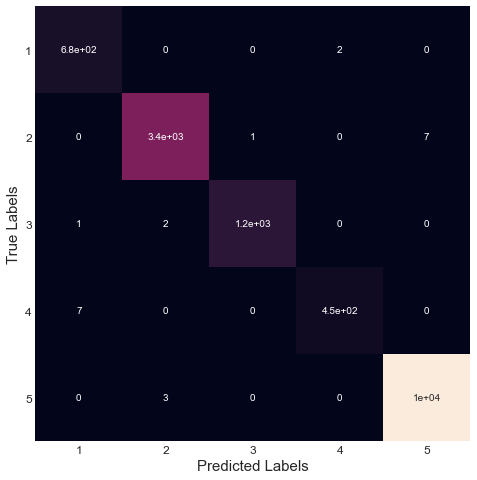

In [120]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

categories = [1, 2,3,4,5]
cm = confusion_matrix(y_test, y_pred_rfc)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

There is no underfitting or overfitting problem for this algorithm since it has training and test scores that are close to each other.

# RESULT

Text(0.5, 1.0, 'Accuracy Scores of the different models')

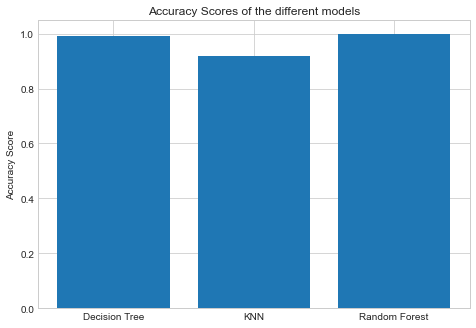

In [132]:
# accuracy scores plot
fig = plt.figure()
scores = [score_dt, score_knn, score_rfc]
scoresize = np.arange(len(scores))
axes = fig.add_axes([0,0,1,1])
axes.bar(['Decision Tree', 'KNN', 'Random Forest'], scores)
axes.set_ylabel("Accuracy Score")
axes.set_title("Accuracy Scores of the different models")

Scores of Decision Tree Classification
* Training set score: 0.9923195084485407
* Test set score: 0.9923371647509579

Scores of KNN algorithm 
* Training set score: 0.9451
* Test set score: 0.9197

Scores of Random Forest Algorithm
* Training set score: 1.0000
* Test set score: 0.9986

According to accuracy score table we can say that the best model of this scenario is Random Forest model. While training set score is 1, test set score is 0.9986, which means there is no overfitting problem for this classification algorithm. 

* If asked, increasing the number of decision tree we can improve random forest algorithm.
* There is some imbalanced problem in this dataset. However, because Random Forest Algorithm is not a simple classification, using cost-sensitive learning, allows us to reach good result. 